In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")



In [4]:
df = pd.read_csv("uber_requests.csv")
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Request Hour,Time Solt
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00,11-07-2016,11:51:00,11,Morning
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47,11-07-2016,17:57:00,17,Evening
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58,12-07-2016,09:17:00,9,Morning
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03,12-07-2016,21:08:00,21,Night
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25,13-07-2016,08:33:16,8,Early Morning


In [5]:
df.shape

(6745, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
 6   Request Date       6745 non-null   object 
 7   Request Time       6745 non-null   object 
 8   Request Hour       6745 non-null   int64  
 9   Time Solt          6745 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 527.1+ KB


In [7]:
df.columns


Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'Request Date', 'Request Time',
       'Request Hour', 'Time Solt'],
      dtype='object')

In [8]:
df['Status']


,Status
0,Trip Completed
1,Trip Completed
2,Trip Completed
3,Trip Completed
4,Trip Completed
...,...
6740,No Cars Available
6741,No Cars Available
6742,No Cars Available
6743,No Cars Available


In [9]:
gap_df = df[df['Status'].isin(['Cancelled', 'No Cars Available'])]


In [10]:

gap_df['Time Solt'].value_counts()


,count
Time Solt,
Early Morning,991
Evening,988
Night,879
Morning,441
Late Night,364
Afternoon,251


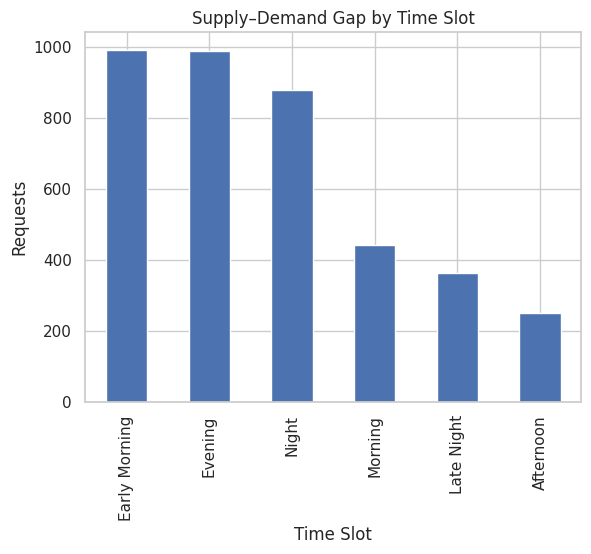

In [11]:
gap_df['Time Solt'].value_counts().plot(kind='bar')
plt.title("Supply–Demand Gap by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Requests")
plt.show()


In [12]:
gap_df['Request Hour'].value_counts().sort_index()


,count
Request Hour,
0,59
1,60
2,62
3,58
4,125
5,260
6,231
7,232
8,268


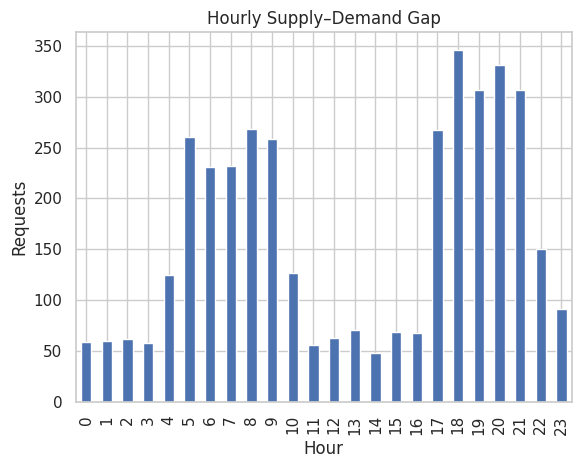

In [13]:
gap_df['Request Hour'].value_counts().sort_index().plot(kind='bar')
plt.title("Hourly Supply–Demand Gap")
plt.xlabel("Hour")
plt.ylabel("Requests")
plt.show()


In [14]:
gap_df['Pickup point'].value_counts()



,count
Pickup point,
City,2003
Airport,1911


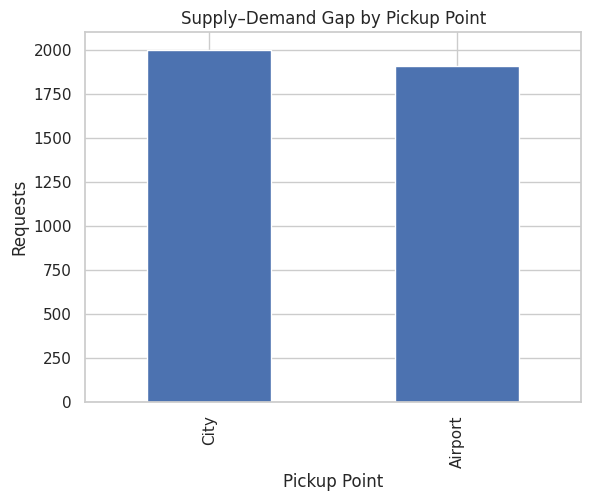

In [15]:
gap_df['Pickup point'].value_counts().plot(kind='bar')
plt.title("Supply–Demand Gap by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Requests")
plt.show()


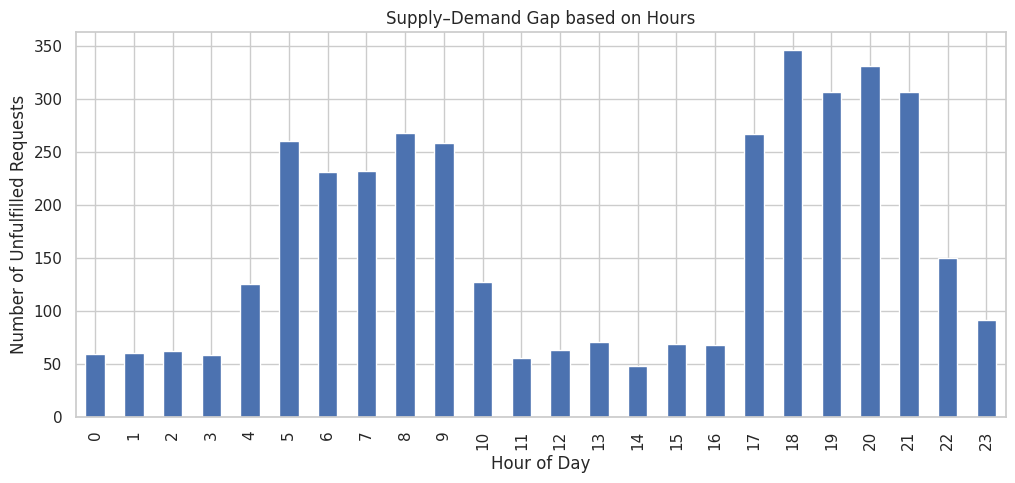

In [16]:
gap_df = df[df['Status'].isin(['Cancelled', 'No Cars Available'])]

hour_gap = gap_df.groupby('Request Hour').size()

plt.figure(figsize=(12,5))
hour_gap.plot(kind='bar')
plt.title("Supply–Demand Gap based on Hours")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Unfulfilled Requests")
plt.show()


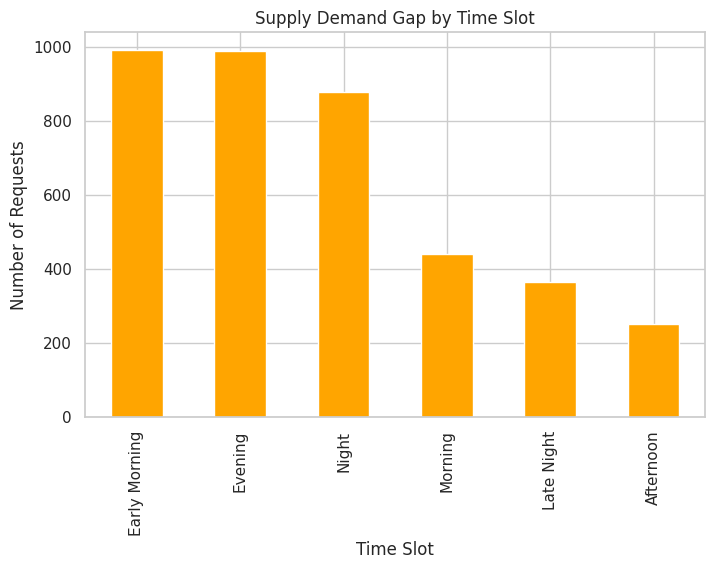

In [17]:
time_slot_gap = gap_df['Time Solt'].value_counts()

plt.figure(figsize=(8,5))
time_slot_gap.plot(kind='bar', color='orange')
plt.title("Supply Demand Gap by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")
plt.show()


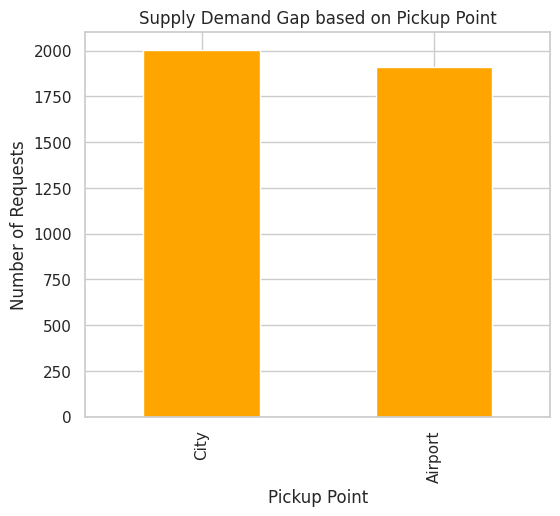

In [18]:
pickup_gap = gap_df['Pickup point'].value_counts()

plt.figure(figsize=(6,5))
pickup_gap.plot(kind='bar', color='orange')
plt.title("Supply Demand Gap based on Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.show()


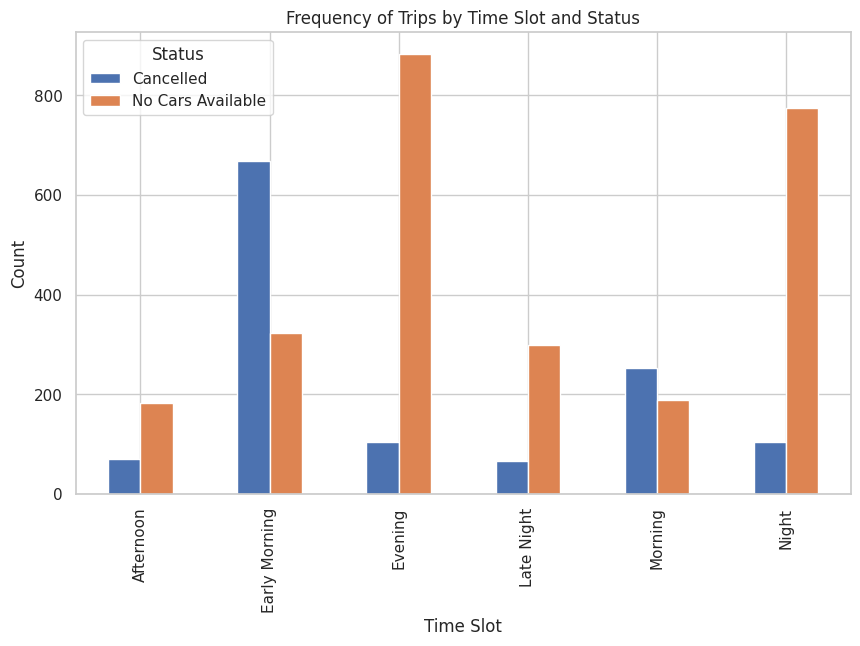

In [19]:
status_time = df[df['Status'].isin(['Cancelled','No Cars Available'])] \
                .groupby(['Time Solt','Status']) \
                .size().unstack()

status_time.plot(kind='bar', figsize=(10,6))
plt.title("Frequency of Trips by Time Slot and Status")
plt.xlabel("Time Slot")
plt.ylabel("Count")
plt.show()


In [20]:
multi = gap_df.groupby(['Pickup point','Time Solt','Status']).size().reset_index(name='Count')

multi.sort_values('Count', ascending=False).head(10)


,Pickup point,Time Solt,Status,Count
5,Airport,Evening,No Cars Available,801
11,Airport,Night,No Cars Available,665
14,City,Early Morning,Cancelled,653
15,City,Early Morning,No Cars Available,309
20,City,Morning,Cancelled,230
21,City,Morning,No Cars Available,159
19,City,Late Night,No Cars Available,151
7,Airport,Late Night,No Cars Available,148
13,City,Afternoon,No Cars Available,127
23,City,Night,No Cars Available,109
